# KNN CLASSIFIER CODE FOR SHOPPING DATASET.

In [5]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "D:\\NIT-J\\AI Lab\\Shopping 5th\\shopping.csv"

# CSV Reading
df = pd.read_csv(file_path)

print(df.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [142]:
df = df.drop(columns=['VisitorType', 'Weekend', 'Month'])

'''dropping these columns becuase they contains categorical values which can not be 
processed by knn because it calculates distances'''

In [131]:
df['Revenue'] = df['Revenue'].astype(int)

# Can proceed with the bool also but Changing it to int for furthur convenience

In [132]:
X = df.drop(columns=['Revenue'])  
y = df['Revenue']

# Splitting the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        predictions = [self._predict(x) for x in np.array(X_test)[:900]]
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get the k-nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



In [146]:
# Initialize the KNN model with k=5
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)


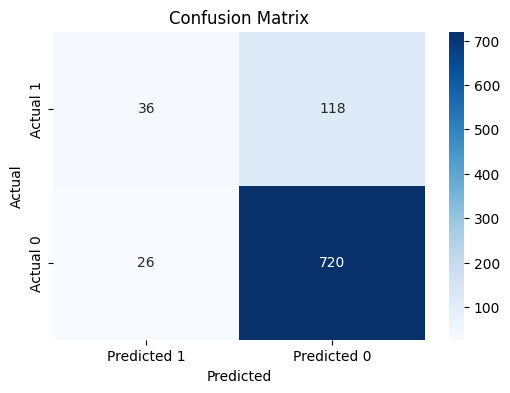

Confusion Matrix:
[[ 36 118]
 [ 26 720]]

The value of accuracy is 0.84 
The value of Recall is 0.23376623376623376
The value of Precision is 0.5806451612903226


In [149]:
# Evaluating the performance by calculating the confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[TP, FN],
                     [FP, TN]]),TP, TN, FP, FN

def performance_measures(TP,TN,FP,FN):
    
    accuracy= (TP+TN)/(TP+TN+FN+FP)
    
    recall= (TP)/(TP+FN)
    
    Precision=(TP/(TP+FP))
    
    print(f"The value of accuracy is {accuracy} \nThe value of Recall is {recall}\nThe value of Precision is {Precision}")
    
cm,TP, TN, FP, FN = confusion_matrix(y_test[:900], y_pred)


# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 0'], yticklabels=['Actual 1', 'Actual 0'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix values
print(f"Confusion Matrix:\n{cm}")
print()
performance_measures(TP,TN,FP,FN)